## Heart Disease Dataset Classification

In [1]:
## Import statement
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
Heart = pd.read_csv("heart-disease.csv")

In [3]:
Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
## Check if there is any missing values.?
Heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
## Try to find out the types of features we have in dataset.
Heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Since all the features are of numeric datatypes
# there is no need to worry about conversion..!
# Let's try to find out the relation between the features
# and target by using matplotlib library

In [7]:
Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Target')]

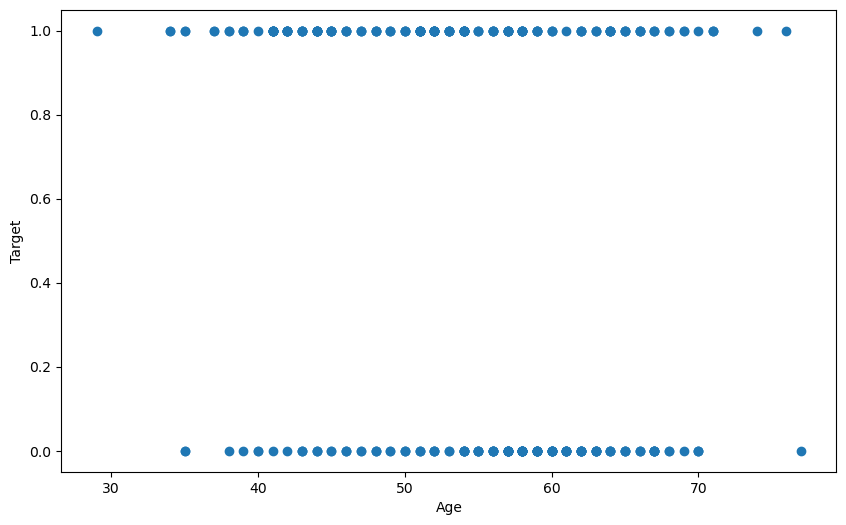

In [8]:
#Let's plot between age and the target
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(Heart["age"],Heart["target"]);
ax.set(xlabel="Age",ylabel="Target")


## As we observe we can't say that, age alone cant' play an important role.Since 
## the patients with heart disease and not are equally distributed.
## So we need some other features too

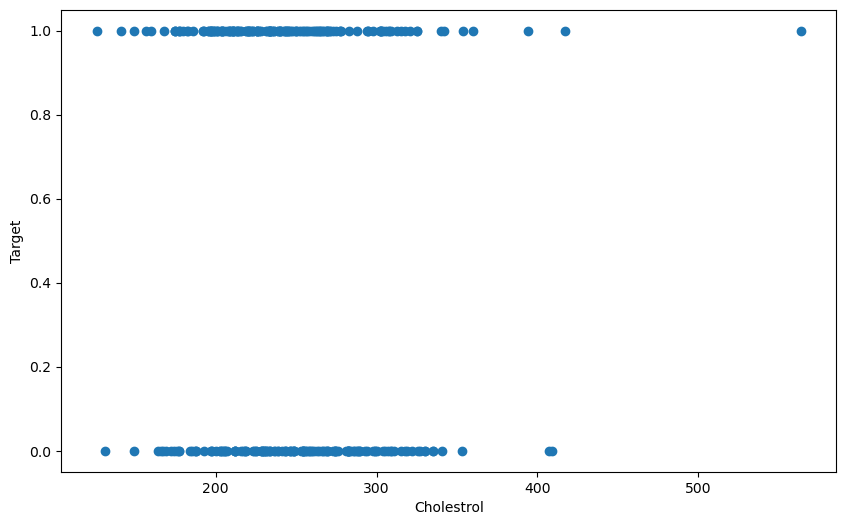

In [9]:
#Let's plot against the chol and target
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(Heart["chol"],Heart["target"]);
ax.set(xlabel="Cholestrol",ylabel="Target");



## Even here as we observe we can't say that, cholestrol individually
## cant' play an important role.Since 
## the patients with heart disease and not are equally distributed over that feature.
## So we need some other features to determine


In [10]:
## We can say that individually not every feature can't help
## in determining the target.They are all dependent on other.
## They form a new feature by combining the existing features.
## This process is known as feature crossing which enhances the 
## model to identify the relation which it missed before when they are individual.
## This feature crossing can be adjusted by humans as well as the models too..
## The random forest algorithms do it automatically.


In [11]:
## Splitting the data

from sklearn.model_selection import train_test_split

X = Heart.drop("target",axis=1)
Y = Heart["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
#The more the training set , the more possibility that the model learns the patterns
# only if the data contains diverse items and less complex content


In [12]:
# Creating the model
# I am using a logistic regression model . We can also go with random forest classifier also

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\SOWJANYA\Desktop\sampleProject1\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
#Let's check the score of training set
model.score(X_train,Y_train)

0.8512396694214877

In [14]:
# Let's check the score of testing set
model.score(X_test,Y_test)

0.8524590163934426

In [15]:
y_preds = model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_preds,Y_test))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        23
           1       0.94      0.82      0.87        38

    accuracy                           0.85        61
   macro avg       0.84      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



## Let's try using the ensemble model


In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,Y_train)


RandomForestClassifier()

In [18]:
clf.score(X_train,Y_train)

1.0

In [19]:
clf.score(X_test,Y_test)

0.819672131147541

In [20]:
Y_preds = clf.predict(X_test)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_preds,Y_test))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78        23
           1       0.91      0.79      0.85        38

    accuracy                           0.82        61
   macro avg       0.81      0.83      0.81        61
weighted avg       0.84      0.82      0.82        61



In [22]:
# we can save the model using the pickle 
import pickle

pickle.dump(clf,open("Heart-Disease-Classification-Estimator" ,"wb"))

In [23]:
Model = pickle.load(open("Heart-Disease-Classification-Estimator","rb"))

In [24]:
Model.score(X_test,Y_test)

0.819672131147541